In [1]:
%matplotlib inline

In [2]:
from umachine_pyio.load_mock import value_added_mock, load_mock_from_binaries
subvolumes = np.random.choice(np.arange(144), 50, replace=False)
vamock = value_added_mock(load_mock_from_binaries(subvolumes), 250)
print("{0} galaxies in downsampled mock".format(len(vamock)))

Total runtime = 11.71 seconds
109010 galaxies in downsampled mock


In [3]:
from empirical_disk_bulge.models.sfr_integration import calculate_merger_histories
from umachine_pyio.load_mock import get_snapshot_times
cosmic_age_array = get_snapshot_times()
sfr_history = vamock['sfr_history_main_prog']
sm_history = vamock['sm_history_main_prog']
# merger_history = calculate_merger_histories(sfr_history, sm_history, cosmic_age_array)

In [6]:
from empirical_disk_bulge.models import disk_in_situ_bulge_ex_situ_decomposition
merger_history = np.zeros_like(sfr_history)
sm_disk, sm_bulge = disk_in_situ_bulge_ex_situ_decomposition(sfr_history, merger_history, cosmic_age_array, 0.)

In [11]:
frac_disk = sm_disk/sm_history[:, -1]
frac_disk.min(), frac_disk.mean(), frac_disk.max()

(0.0026627511946874932, 0.92416713886950075, 1.0040264752482169)

In [12]:
from empirical_disk_bulge.models.sfr_integration import in_situ_fraction
sfr_history = vamock['sfr_history_main_prog']
sm_history = vamock['sm_history_main_prog']
redshift = 0.
frac_in_situ = in_situ_fraction(sfr_history, sm_history, redshift, cosmic_age_array)


0.995 of galaxies have Fdisk and Fin-situ that agree within 0.010


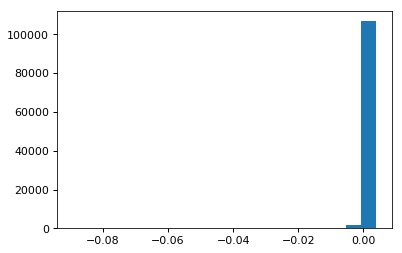

In [25]:
fig, ax = plt.subplots(1, 1)

__=ax.hist(frac_disk-frac_in_situ, bins=20)
tol = 0.01
correct_fraction = np.count_nonzero(np.abs(frac_disk-frac_in_situ) < tol)/float(len(frac_disk))

msg = "{0:.3f} of galaxies have F_disk and F_in-situ that agree within {1:.3f}"
print(msg.format(correct_fraction, tol))

In [ ]:
from empirical_disk_bulge.observations import sfr_sequence_bulge_disk_fractions_vs_sm
sm = np.log10(vamock['obs_sm'])
bt = vamock['bt']
ssfr = np.log10(vamock['obs_sfr']/vamock['obs_sm'])
result = sfr_sequence_bulge_disk_fractions_vs_sm(sm, bt, ssfr)

In [ ]:
from empirical_disk_bulge.observations.binned_pdfs import gaussian_kernel_selection

mask = gaussian_kernel_selection(sm, 9.75, 0.1)

In [ ]:
from empirical_disk_bulge.observations.binned_pdfs import bulge_disk_fractions_vs_sm
domination_vals = (0.25, 0.75)
sigma_sm = 0.1
sm_abscissa = (9.75, 10.25, 11)
sm_abscissa=np.arange(9.75, 11.35, 0.1)
frac_disk_dom_all, frac_bulge_dom_all = bulge_disk_fractions_vs_sm(bt, sm, sm_abscissa, domination_vals, sigma_sm)

In [ ]:
fig, ax = plt.subplots(1, 1)

__=ax.plot(sm_abscissa, frac_bulge_dom_all, color='red')
__=ax.plot(sm_abscissa, frac_disk_dom_all, color='blue')

In [ ]:
fig, ax = plt.subplots(1, 1)

bins = np.linspace(0, 1, 25)

mask = vamock['obs_sm'] < 10**10
__=ax.hist(vamock['bt'][mask], bins=bins, normed=True, color='blue')

mask = vamock['obs_sm'] > 10**11
__=ax.hist(vamock['bt'][mask], bins=bins, normed=True, color='red')

mask = (vamock['obs_sm'] < 10**11.1) & (vamock['obs_sm'] > 10**11)
__=ax.hist(vamock['bt'][mask], bins=bins, normed=True, color='green')


In [ ]:
np.mean(vamock['bt'][mask])

In [ ]:
from empirical_disk_bulge.models.sfr_integration import in_situ_fraction
sfr_history = vamock['sfr_history_main_prog']
sm_history = vamock['sm_history_main_prog']
redshift = 0.
frac_in_situ = in_situ_fraction(sfr_history, sm_history, redshift, cosmic_age_array)
vamock['frac_in_situ'] = frac_in_situ

In [ ]:
fig, ax = plt.subplots(1, 1)

bins = np.linspace(0, 1, 50)
mask = vamock['obs_sm'] < 10**10
__=ax.hist(1-vamock['frac_in_situ'][mask], bins=bins, normed=True, 
           label=r'$1-F_{\rm in-situ}$')
__=ax.hist(vamock['bt'][mask], bins=bins, normed=True, label='B/T')

legend = ax.legend()

In [ ]:
fig, ax = plt.subplots(1, 1)

bins = np.linspace(0, 1, 50)

mask = vamock['obs_sm'] > 10**11
__=ax.hist(1-vamock['frac_in_situ'][mask], bins=bins, normed=True, 
           label=r'$1-F_{\rm in-situ}$')
__=ax.hist(vamock['bt'][mask], bins=bins, normed=True, label='B/T')

legend = ax.legend()